In [116]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import numpy as np
import utils
import cv2

In [117]:
img = cv2.imread('img.jpg')
img2 = cv2.imread('patente.jpg')

# show our image
#cv2.imshow('image',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
#img.shape

In [118]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img.shape
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [119]:
image = img.reshape((img.shape[0] * img.shape[1], 3))
image2 = img2.reshape((img2.shape[0] * img2.shape[1], 3))
image.shape

(576114, 3)

In [131]:
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
 
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    #print("somma hist: ",hist.sum())
    print("unnormalized hist values per cluster:", hist)
    hist /= hist.sum()
 
    # return the histogram
    return hist

In [121]:
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
 
    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX
    
    # return the bar chart
    return bar

unnormalized hist values per cluster: [508911.  12437.  12557.  16594.   8194.  17421.]


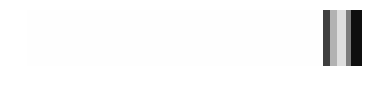

In [132]:
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
# cluster the pixel intensities
clt = KMeans(n_clusters = 6)#args["clusters"])
clt.fit(image)

hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
 
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

unnormalized hist values per cluster: [ 11680.  74900.  10337.   8370. 113360.  37353.]


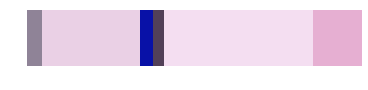

In [133]:
clt = KMeans(n_clusters = 6)#args["clusters"])
clt.fit(image2)

hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
 
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [124]:
#hist = cv2.calcHist([img],[2],None,[256],[0,256])
#plt.hist(img.ravel(),256,[0,256]); plt.show()

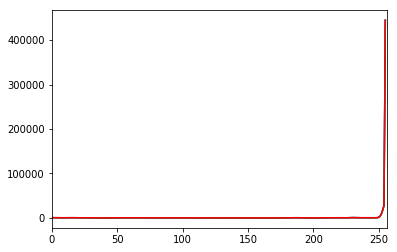

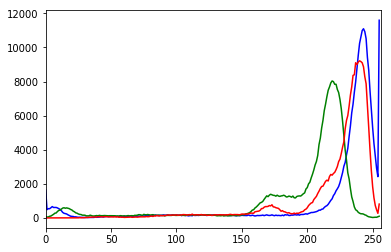

In [128]:
def hist_plot(image):
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([image],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()

hist_plot(img)
hist_plot(img2)

## Histogram Backprojection

It is used for image segmentation or finding objects of interest in an image. In simple words, it creates an image of the same size (but single channel) as that of our input image, where each pixel corresponds to the probability of that pixel belonging to our object. 

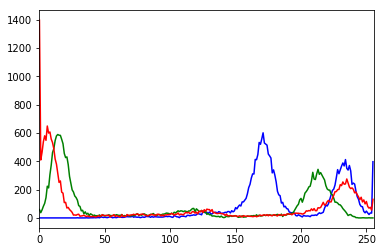

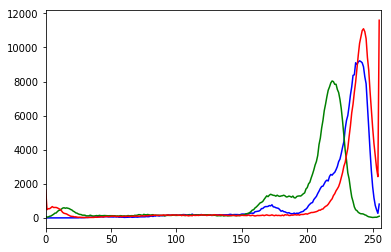

In [165]:
roi = cv2.imread('europe.jpg')
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)

target = cv2.imread('patente.jpg')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)

hist_plot(roi)
hist_plot(target)

# calculating object histogram
roihist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )

# normalize histogram and apply backprojection
cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)

# Now convolute with circular disc
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(dst,-1,disc,dst)

# threshold and binary AND
ret,thresh = cv2.threshold(dst,50,255,0)
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(target,thresh)

res = np.vstack((target,thresh,res))
#cv2.imwrite('res.jpg',res)